In [2]:
import pandas as pd

# Getting data from BoxOfficeMojo
* Read data from BoxOfficeMojo 
* Do some basic cleaning and formatting 
* Write as CSV file

In [118]:
results = pd.read_html('https://www.boxofficemojo.com/release/rl3059975681')

In [119]:
filepath = Path('datasets/boxofficemojo_avengers_endgame.csv')

In [120]:
ts = results[0]
ts.head()

,Date,DOW,Rank,Daily,%± YD,%± LW,Theaters,Avg,To Date,Day,Estimated
0,"Apr 26, 2019",Friday,1,"$157,461,641",-,-,4662,"$33,775","$157,461,641",1,False
1,"Apr 27, 2019",Saturday,1,"$109,264,122",-30.6%,-,4662,"$23,437","$266,725,763",2,False
2,"Apr 28, 2019",Sunday,1,"$90,389,244",-17.3%,-,4662,"$19,388","$357,115,007",3,False
3,"Apr 29, 2019",Monday,1,"$36,874,439",-59.2%,-,4662,"$7,909","$393,989,446",4,False
4,"Apr 30, 2019",Tuesday,1,"$33,110,349",-10.2%,-,4662,"$7,102","$427,099,795",5,False


In [121]:
ts['Daily'] = ts['Daily'].str.replace(",", "")
ts['Daily'] = ts['Daily'].str[1:].astype(int)
ts['Avg'] = ts['Avg'].str.replace(",", "")
ts['Avg'] = ts['Avg'].str[1:].astype(int)
ts['To Date'] = ts['To Date'].str.replace(",", "")
ts['To Date'] = ts['To Date'].str[1:].astype(int)

In [122]:
ts.to_csv(filepath, index=False)

## Reading Time Series Data in CSV format 

In [123]:
from pathlib import Path

Path.cwd()

PosixPath('/Users/tarekatwan/Downloads/mining-data-time-series/script and datasets')

Using `parse_dates`

In [161]:
ts = pd.read_csv(filepath,
                header=0,
                parse_dates=[0],
                index_col=0,
                infer_datetime_format=True)
ts.head()

,DOW,Rank,Daily,%± YD,%± LW,Theaters,Avg,To Date,Day,Estimated
Date,,,,,,,,,,
2019-04-26,Friday,1,157461641,-,-,4662,33775,157461641,1,False
2019-04-27,Saturday,1,109264122,-30.6%,-,4662,23437,266725763,2,False
2019-04-28,Sunday,1,90389244,-17.3%,-,4662,19388,357115007,3,False
2019-04-29,Monday,1,36874439,-59.2%,-,4662,7909,393989446,4,False
2019-04-30,Tuesday,1,33110349,-10.2%,-,4662,7102,427099795,5,False


In [144]:
ts.index

DatetimeIndex(['2019-04-26', '2019-04-27', '2019-04-28', '2019-04-29',
               '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03',
               '2019-05-04', '2019-05-05',
               ...
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10',
               '2019-09-11', '2019-09-12'],
              dtype='datetime64[ns]', name='Date', length=140, freq=None)

using `date_parser` for more complex situations

In [162]:
from datetime import datetime

date_parser = lambda x: datetime.strptime(x, "%b %d, %Y")

ts = pd.read_csv(filepath,
                header=0,
                parse_dates=[0],
               index_col=0,
                date_parser=date_parser)
ts.head()

,DOW,Rank,Daily,%± YD,%± LW,Theaters,Avg,To Date,Day,Estimated
Date,,,,,,,,,,
2019-04-26,Friday,1,157461641,-,-,4662,33775,157461641,1,False
2019-04-27,Saturday,1,109264122,-30.6%,-,4662,23437,266725763,2,False
2019-04-28,Sunday,1,90389244,-17.3%,-,4662,19388,357115007,3,False
2019-04-29,Monday,1,36874439,-59.2%,-,4662,7909,393989446,4,False
2019-04-30,Tuesday,1,33110349,-10.2%,-,4662,7102,427099795,5,False


In [163]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140 entries, 2019-04-26 to 2019-09-12
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DOW        140 non-null    object
 1   Rank       140 non-null    int64 
 2   Daily      140 non-null    int64 
 3   %± YD      140 non-null    object
 4   %± LW      140 non-null    object
 5   Theaters   140 non-null    int64 
 6   Avg        140 non-null    int64 
 7   To Date    140 non-null    int64 
 8   Day        140 non-null    int64 
 9   Estimated  140 non-null    bool  
dtypes: bool(1), int64(6), object(3)
memory usage: 11.1+ KB


In [164]:
ts.index

DatetimeIndex(['2019-04-26', '2019-04-27', '2019-04-28', '2019-04-29',
               '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03',
               '2019-05-04', '2019-05-05',
               ...
               '2019-09-03', '2019-09-04', '2019-09-05', '2019-09-06',
               '2019-09-07', '2019-09-08', '2019-09-09', '2019-09-10',
               '2019-09-11', '2019-09-12'],
              dtype='datetime64[ns]', name='Date', length=140, freq=None)

<AxesSubplot:xlabel='Date'>

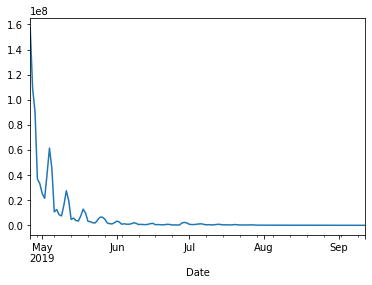

In [165]:
ts['Daily'].plot()

In [166]:
%time
ts_1 = pd.read_csv(filepath_or_buffer=filepath,
                sep=',',
                header=0,
                parse_dates=[0],
                index_col=0,
                infer_datetime_format=False)
ts_1.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


,DOW,Rank,Daily,%± YD,%± LW,Theaters,Avg,To Date,Day,Estimated
Date,,,,,,,,,,
2019-04-26,Friday,1,157461641,-,-,4662,33775,157461641,1,False
2019-04-27,Saturday,1,109264122,-30.6%,-,4662,23437,266725763,2,False
2019-04-28,Sunday,1,90389244,-17.3%,-,4662,19388,357115007,3,False
2019-04-29,Monday,1,36874439,-59.2%,-,4662,7909,393989446,4,False
2019-04-30,Tuesday,1,33110349,-10.2%,-,4662,7102,427099795,5,False


In [167]:
%time
ts_2 = pd.read_csv(filepath_or_buffer=filepath,
                sep=',',
                header=0,
                parse_dates=[0],
                index_col=0,
                infer_datetime_format=True)
ts_2.head()

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.81 µs


,DOW,Rank,Daily,%± YD,%± LW,Theaters,Avg,To Date,Day,Estimated
Date,,,,,,,,,,
2019-04-26,Friday,1,157461641,-,-,4662,33775,157461641,1,False
2019-04-27,Saturday,1,109264122,-30.6%,-,4662,23437,266725763,2,False
2019-04-28,Sunday,1,90389244,-17.3%,-,4662,19388,357115007,3,False
2019-04-29,Monday,1,36874439,-59.2%,-,4662,7909,393989446,4,False
2019-04-30,Tuesday,1,33110349,-10.2%,-,4662,7102,427099795,5,False


## Reading Time Series Data from an Excel file

In [35]:
from pathlib import Path
filepath = Path('datasets/sales_trx_data.xlsx')

In [40]:
ts = pd.read_excel(io= filepath, engine='openpyxl', index_col=1, sheet_name=[0,1])
ts.keys()

dict_keys([0, 1])

In [37]:
ts_all = pd.concat(ts)
ts_all.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 74124 entries, (0, Timestamp('2017-01-01 00:00:00')) to (1, Timestamp('2018-12-31 00:00:00'))
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line_Item_ID        74124 non-null  int64 
 1   Credit_Card_Number  74124 non-null  int64 
 2   Quantity            74124 non-null  int64 
 3   Menu_Item           74124 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.5+ MB


In [38]:
ts = pd.concat(pd.read_excel(io=filepath, engine='openpyxl', index_col=1, sheet_name=None))

In [39]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 74124 entries, ('sales_2017', Timestamp('2017-01-01 00:00:00')) to ('sales_2018', Timestamp('2018-12-31 00:00:00'))
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Line_Item_ID        74124 non-null  int64 
 1   Credit_Card_Number  74124 non-null  int64 
 2   Quantity            74124 non-null  int64 
 3   Menu_Item           74124 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.5+ MB
